In [16]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [17]:
print('Training set image shape:', x_train.shape)
print('Training set label shape:', y_train.shape) 
print('Test set image shape:', x_test.shape) 
print('Test set label shape:', y_test.shape) 

Training set image shape: (50000, 32, 32, 3)
Training set label shape: (50000, 1)
Test set image shape: (10000, 32, 32, 3)
Test set label shape: (10000, 1)


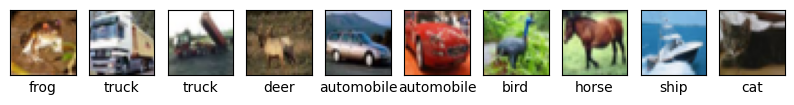

In [18]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

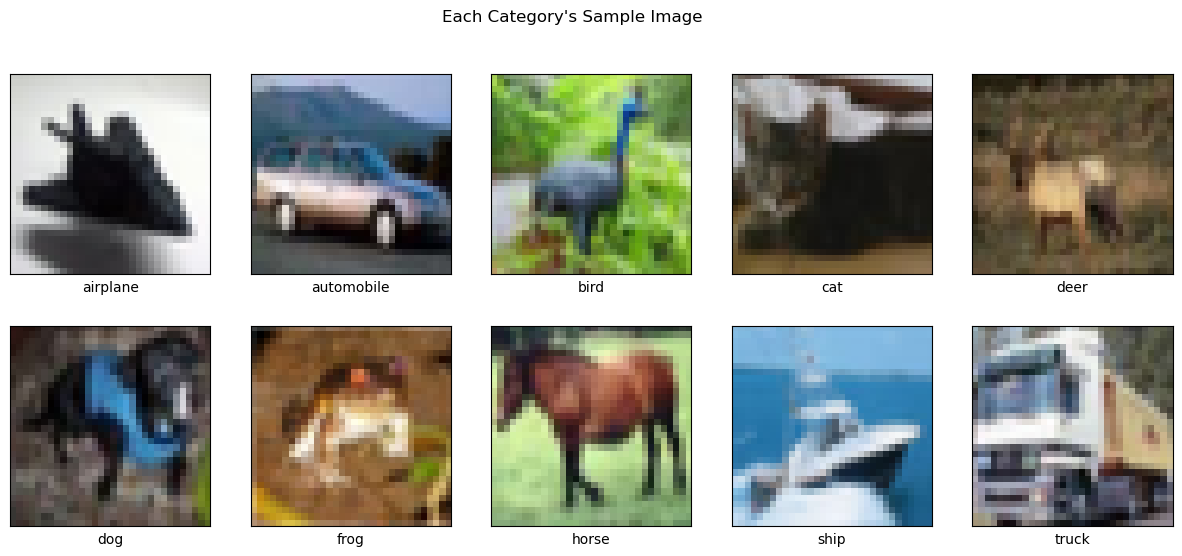

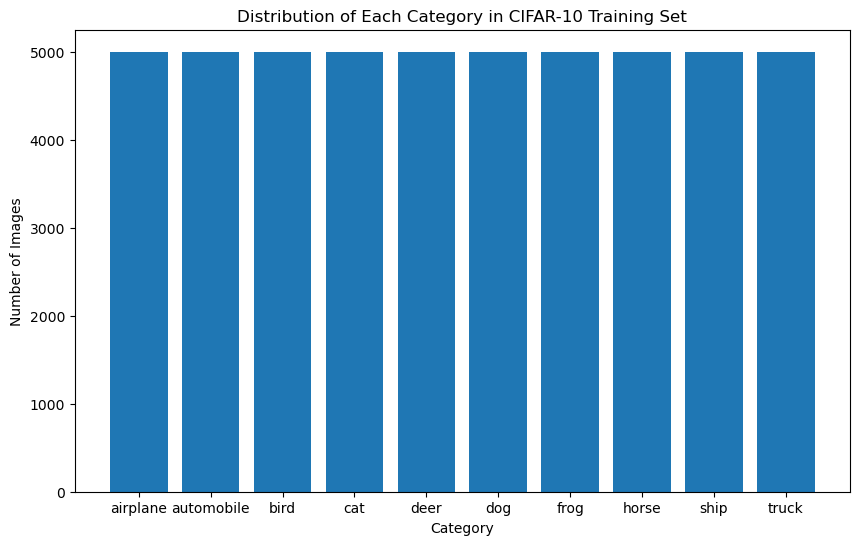

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 6))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx])
    plt.xlabel(class_names[i])
plt.suptitle("Each Category's Sample Image")
plt.show()

unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Each Category in CIFAR-10 Training Set")
plt.show()

In [19]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### Start training the baseline model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define simple baseline CNN models
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5690 - accuracy: 0.4257 - val_loss: 1.2996 - val_accuracy: 0.5330
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1957 - accuracy: 0.5737 - val_loss: 1.1259 - val_accuracy: 0.5995
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0418 - accuracy: 0.6334 - val_loss: 0.9968 - val_accuracy: 0.6446
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9437 - accuracy: 0.6694 - val_loss: 1.0346 - val_accuracy: 0.6393
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8679 - accuracy: 0.6952 - val_loss: 0.9107 - val_accuracy: 0.6800
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7986 - accuracy: 0.7196 - val_loss: 0.9417 - val_accuracy: 0.6759
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7491 - accuracy: 0.7396 - val_loss: 0.8728 - val_accuracy:

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.6866


In [23]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1000
           1       0.83      0.82      0.82      1000
           2       0.55      0.66      0.60      1000
           3       0.50      0.47      0.49      1000
           4       0.68      0.61      0.65      1000
           5       0.64      0.51      0.56      1000
           6       0.72      0.77      0.74      1000
           7       0.75      0.72      0.74      1000
           8       0.74      0.83      0.78      1000
           9       0.85      0.69      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

